# Exploratory Notebook

# Business Understanding

## Business Context
Our company is entering the competitive movie production industry by establishing a new movie studio. With major corporations increasingly investing in original video content, we need to strategically position ourselves to maximize our chances of box office success.

## Primary Stakeholder
**Head of New Movie Studio** - The key decision-maker who will use our analysis to guide the studio's content creation strategy and investment decisions.

## Key Business Questions

### 1. **What genres are most profitable?**
   - Which movie genres consistently generate the highest box office returns?
   - Are there emerging genres showing strong growth potential?

### 2. **What budget ranges optimize ROI?**
   - What is the relationship between production budget and box office performance?
   - What budget sweet spot maximizes return on investment?

### 3. **When should we release our films?**
   - Which months/seasons show the strongest box office performance?
   - How can we avoid oversaturated release periods?

## Business Objectives
- **Primary Goal:** Identify the most profitable film characteristics to guide our initial movie productions
- **Success Metrics:** Maximize box office revenue and return on investment
- **Risk Mitigation:** Minimize financial losses by avoiding poorly-performing film categories

## Data Requirements & Analysis Considerations

### Dataset Specifications Needed:
1. **What movie data do we have access to?** (Box office numbers, budgets, genres, release dates, ratings, etc.)
2. **What time period does our data cover?** (Recent years only, or historical data?)
3. **Is it domestic box office, international, or worldwide gross?**

### Business Context Clarifications:
4. **What size studio are we targeting?** (Independent/small budget vs. major studio competitor?)
5. **Are there any genre restrictions?** (Family-friendly only, or open to all ratings?)
6. **Geographic focus?** (Domestic US market, international, or global?)

### Analysis Scope Considerations:
7. **Should we consider streaming/digital revenue or just theatrical box office?**
8. **Do we want to analyze competitor studios' strategies?**
9. **Should seasonal trends consider COVID-19 impact on recent years?**

## Success Metrics Framework
**Primary Metrics:**
- **Gross Revenue:** Total box office performance
- **Return on Investment (ROI):** (Revenue - Budget) / Budget × 100
- **Profit Margins:** Net profit as percentage of revenue
- **Budget Efficiency:** Revenue per dollar invested

**Secondary Metrics:**
- **Market Share:** Performance relative to industry
- **Risk Assessment:** Variance in returns by category
- **Audience Reach:** Ticket sales and demographic penetration

## Recommended Visualizations Strategy

### 1. **Genre Analysis**
- **Horizontal Bar Chart:** Average revenue by genre (easy comparison)
- **Box Plot:** Revenue distribution by genre (shows variability and outliers)
- **Scatter Plot:** Budget vs. Revenue by genre (profitability insights)

### 2. **Budget Optimization**
- **Scatter Plot with Trend Line:** Budget vs. ROI (sweet spot identification)
- **Histogram:** Distribution of profitable budget ranges
- **Bubble Chart:** Budget vs. Revenue (bubble size = profit margin)

### 3. **Release Timing**
- **Line Graph:** Monthly box office performance over time
- **Heatmap:** Revenue by month and genre combination
- **Seasonal Bar Chart:** Quarterly performance comparison

### 4. **Risk vs. Reward Analysis**
- **Risk-Return Scatter Plot:** Average return vs. standard deviation by category
- **Waterfall Chart:** Success rate breakdown by film characteristics

## Expected Deliverables
Three concrete, data-driven recommendations that the Head of Movie Studio can immediately implement in the studio's content strategy and production planning.

# Data Understanding

`bom.movie_gross.csv.gz` dataset from Box Office Mojo contains the revenue data for various films. It contains the following five columns:

- **title**: movie title
- **studio**: producing studio
- **domestic_gross**: domestic gross earnings in USD
- **foreign_gross**: international gross earnings
- **year**: year film was released

`im` database from IMDb (Internet Movie Database) contains information about the movies and those who worked on them. It contains eight tables with the following fields:
- `directors` table contains the directors. It contains the following two fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **person_id**: director's ID (as per IMDb)
- `known_for` table contains the notable works for each person. It contains the following two fields:
    - **person_id**: unique person ID (as per IMDb)
    - **movie_id**: unique movie ID (as per IMDb)
- `movie_akas` table contains the alternative titles of the movies. It contains the following eight fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **ordering**: order in which movie title appears
    - **title**: alternative title for the movie
    - **region**: country code where movie was shown
    - **language**: language code of the movie
    - **types**: type of alternative title
    - **attributes**: special attributes of the movie
    - **is_original_title**: shows whether alternative title is the origianl title (1 = original title, 0 = alternative title)
- `movie_basics` table contains basic information about the movies. It contains the following six fields:
    - **movie_id**: unique identifier for the movie (as per IMDb)
    - **primary_title**: official title of the movie
    - **original_title**: official title of the movie in the original language
    - **start_year**: year when the movie was released
    - **runtime_minutes**: duration of the movie in minutes
    - **genres**: genre(s) of the movie
- `movie_ratings` table contains the ratings movies were given by IMDb. It contains the following three fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **averagerating**: average IMDb rating
    - **numvotes**: number of votes received
- `persons` table contains records of those involved in the movies. It has the following five fields:
    - **person_id**: unique identifier for the person (as per IMDb)
    - **primary_name**: full name of the person
    - **birth_year**: year of birth
    - **death_year**: year of death (if dead)
    - **primary_profession**: role in the movie
- `principals` table contains the information of the main cast and crew. It has the following five fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **ordering**: order of person in credits
    - **person_id**: unique person ID (as per IMDb)
    - **category**: role played
    - **job**: specific role
    - **characters**: character name
- `writers` table contains the following two fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **person_id**: writer's ID (as per IMDb)

`rt.movie_info.tsv.gz` dataset from Rotten Tomatoes contains general information about the movies. It contains the following twelve columns:
- **id**: unique movie ID (as per Rotten Tomatoes)
- **synopsis**: short summary of the movie
- **rating**: Motion Picture Association of America(MPAA) Rating
- **genre**: genre(s) of the movie
- **director**: name of the director(s)
- **writer**: name of the writer(s)
- **theater_date**: date released in theaters
- **dvd_date**: date released in DVD format
- **currency**: currency symbol
- **box_office**: total revenue from box office
- **runtime**: movie duration in minutes
- **studio**: producing studios

`rt.reviews.tsv.gz` dataset from Rotten Tomatoes contains review information about movies. It contains the following eight columns:
- **id**: unique movie ID (as per Rotten Tomatoes)
- **review**: review text
- **rating**: rating given by critic
- **fresh**: categorization of the review (fresh = positive, rotten = negative)
- **critic**: name of the critic
- **top_critic**: highlights if a critic is regarded as a Top Critic by Rotten Tomatoes (1 = top critic, 0 = not a top critic)
- **publisher**: publication name
- **date**: date of the review

`tmdb.movies.csv.gz` from The Movie Database (TMDb) contains movie and rating informations about various movies. It contains the following nine columns:
- **genre_ids**: list of genre(s) for the movie
- **id**: unique movie ID (as per TMDb)
- **original_language**: language code for the movie
- **original_title**: title of the movie in the official language
- **popularity**: popularity score (as per TMDb)
- **relaease_date**: release date in theatres
- **title**: movie title
- **vote_average**: average user rating
- **vote_count**: total votes received

`tn.movie_budgets.csv.gz` from The Numbers dataset contains movie budget and revenue information. It has the following six columns:
- **id**: unique movie ID (as per The Numbers)
- **release_date**: rlease date in theatres
- **movie**: movie title
- **production_budget**: budget used (in USD)
- **domestic_gross**: revenue generatedfrom country of origin (in USD)
- **worldwide_gross**: total revenue generated worldwide (in USD)


In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import sqlite3

In [13]:
path_1 = ("../Data/bom.movie_gross.csv")
path_2 = ("../Data/rt.movie_info.tsv")
path_3 = ("../Data/rt.reviews.tsv")
path_4 = ("../Data/tmdb.movies.csv")
path_5 = ("../Data/tn.movie_budgets.csv")

In [92]:

bom_movie = pd.read_csv(path_1)
rt_info = pd.read_csv(path_2, sep='\t', encoding='latin1')


rt_reviews = pd.read_csv(path_3, sep='\t', encoding='latin1')

tmdb_df = pd.read_csv(path_4)
tn_budget = pd.read_csv(path_5)

## bom_movie data cleaning 

In [99]:
#bom_movie data cleaning 
# checking the first rows
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [100]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [114]:
#checking  on columns

bom_movie.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [102]:
#summary
bom_movie.describe( include='all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,3.387000e+03,3387.000000
unique,3386,257,NaN,NaN,NaN
top,Bluebeard,IFC,NaN,NaN,NaN
freq,2,166,NaN,NaN,NaN
mean,NaN,NaN,2.874585e+07,5.259091e+07,2013.958075
std,NaN,NaN,6.698250e+07,1.100108e+08,2.478141
min,NaN,NaN,1.000000e+02,6.000000e+02,2010.000000
25%,NaN,NaN,1.200000e+05,1.175000e+07,2012.000000
50%,NaN,NaN,1.400000e+06,1.890000e+07,2014.000000
75%,NaN,NaN,2.790000e+07,2.915000e+07,2016.000000


In [103]:
#checking on duplicates
bom_movie.duplicated().sum()

0

In [104]:
#checking on null values
bom_movie.isnull().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [105]:
#filling the null values on studio col
bom_movie['studio'].fillna('unknown', inplace=True)
bom_movie.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1144\1925145961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom_movie['studio'].fillna('unknown', inplace=True)


title              0
studio             0
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

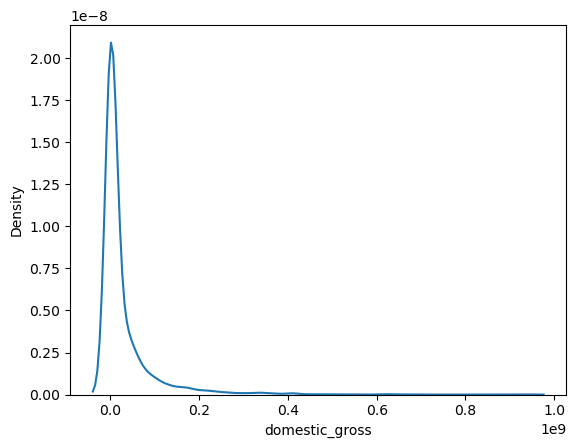

In [106]:
##Using median to impute null values on domestic-gross col
bom_movie['domestic_gross'].skew()
sns.kdeplot(bom_movie['domestic_gross']);



In [107]:

median_dom_gross = bom_movie.domestic_gross.median()
bom_movie['domestic_gross'].fillna(median_dom_gross, inplace=True)
bom_movie.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1144\480129313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom_movie['domestic_gross'].fillna(median_dom_gross, inplace=True)


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [108]:
## Coverting foreign gross object column into Float
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')
bom_movie['foreign_gross']

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382     18900000.0
3383     18900000.0
3384     18900000.0
3385     18900000.0
3386     18900000.0
Name: foreign_gross, Length: 3387, dtype: float64

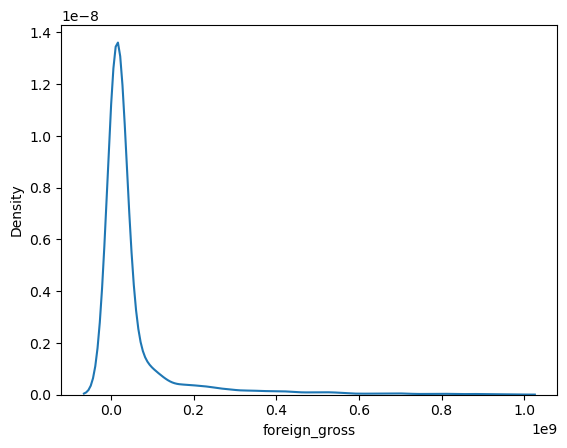

In [109]:
#sing median to impute null values on foreign-gross col
bom_movie['foreign_gross'].skew()
sns.kdeplot(bom_movie['foreign_gross']);

In [111]:
#filling null values on foreign_gross col
median_foreign_gross = bom_movie.foreign_gross.median()
bom_movie['foreign_gross'].fillna(median_foreign_gross, inplace=True)
bom_movie.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [129]:
#feature engineering
bom_movie['total_gross'] = bom_movie['domestic_gross'] + bom_movie['foreign_gross'] 
print(bom_movie[['year', 'total_gross']].head())
#bom_movie['total_gross'] 


   year   total_gross
0  2010  1.067000e+09
1  2010  1.025500e+09
2  2010  9.603000e+08
3  2010  8.283000e+08
4  2010  7.526000e+08


In [130]:
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')

In [132]:
#converting year column to datetime
bom_movie['year'] = pd.to_datetime(bom_movie['year'])
bom_movie['year']

0      1970-01-01 00:00:00.000002010
1      1970-01-01 00:00:00.000002010
2      1970-01-01 00:00:00.000002010
3      1970-01-01 00:00:00.000002010
4      1970-01-01 00:00:00.000002010
                    ...             
3382   1970-01-01 00:00:00.000002018
3383   1970-01-01 00:00:00.000002018
3384   1970-01-01 00:00:00.000002018
3385   1970-01-01 00:00:00.000002018
3386   1970-01-01 00:00:00.000002018
Name: year, Length: 3387, dtype: datetime64[ns]

In [ ]:
#going through SQl
def load_tables(connection):
    table_names = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", connection
    )["name"].tolist()
    sql_tables = {
        table_name: pd.read_sql(f"SELECT * FROM {table_name}", connection)
        for table_name in table_names
    }
    return sql_tables

path = '../Data/im.db'
conn = sqlite3.connect(path)

imdb_tables = load_tables(conn)

print(imdb_tables.keys())


In [16]:
movie_basics_copy = imdb_tables["movie_basics"].copy(deep=True)
movie_basics_copy


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [17]:
movie_basics_copy.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
movie_basics_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [19]:
movie_basics_copy.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [20]:
movie_basics_copy.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [21]:
movie_basics_copy.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [60]:
movie_basics_copy['original_title'].fillna('unknown',inplace = True)
movie_basics_copy.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [23]:
median_runtime_minutes = movie_basics_copy['runtime_minutes'].median()
movie_basics_copy['runtime_minutes'].fillna(median_runtime_minutes, inplace=True)
movie_basics_copy.isnull().sum()


C:\Users\User\AppData\Local\Temp\ipykernel_1144\4005903544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_basics_copy['runtime_minutes'].fillna(median_runtime_minutes, inplace=True)


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [24]:
movie_basics_copy['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                    None
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [25]:
movie_basics_copy['genres'].fillna('unknown',inplace = True)
movie_basics_copy.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [26]:
movie_basics_copy.duplicated().sum()

0

In [27]:
movie_ratings_copy = imdb_tables["movie_ratings"]
movie_ratings_copy


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [28]:
movie_ratings_copy.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [29]:
movie_ratings_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [30]:
movie_ratings_copy.describe()


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [31]:
movie_ratings_copy.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [32]:
movie_ratings_copy.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [33]:
movie_ratings_copy.duplicated().sum()

0

In [34]:
persons_copy = imdb_tables["persons"]
persons_copy

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [35]:
persons_copy.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [36]:
persons_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [37]:
persons_copy.describe()

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [38]:
persons_copy.columns

Index(['person_id', 'primary_name', 'birth_year', 'death_year',
       'primary_profession'],
      dtype='object')

In [39]:
persons_copy.isnull().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [40]:
persons_copy.drop(['birth_year', 'death_year'], axis=1, inplace=True)
persons_copy.isnull().sum()

person_id                 0
primary_name              0
primary_profession    51340
dtype: int64

In [41]:
persons_copy['primary_profession'].fillna('unknown',inplace = True)
persons_copy.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1144\2212961481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  persons_copy['primary_profession'].fillna('unknown',inplace = True)


person_id             0
primary_name          0
primary_profession    0
dtype: int64

In [42]:
persons_copy.duplicated().sum()

0

In [43]:
principals_copy = imdb_tables["principals"]
principals_copy


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [44]:
principals_copy.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [45]:
principals_copy.describe()

,ordering
count,1.028186e+06
mean,4.739847e+00
std,2.747446e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


In [46]:
principals_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [47]:
principals_copy.columns

Index(['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters'], dtype='object')

In [48]:
principals_copy.isnull().sum()

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64

In [49]:
principals_copy.dropna(inplace=True)
principals_copy.isnull().sum()


movie_id      0
ordering      0
person_id     0
category      0
job           0
characters    0
dtype: int64

In [50]:
principals_copy.duplicated().sum()

0

In [51]:
directors = imdb_tables['directors']
directors.info()
directors.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


movie_id     0
person_id    0
dtype: int64

In [52]:
directors_clean = imdb_tables['directors'].copy(deep=True)

before = directors_clean.shape[0]
directors_clean.drop_duplicates(keep='first', inplace=True)
after = directors_clean.shape[0]

print(f"Dropped {before - after} duplicate rows.")
print(directors_clean.shape)


Dropped 127639 duplicate rows.
(163535, 2)


In [53]:
known_for = imdb_tables['known_for']
print(known_for.info())
print(known_for.isna().sum())
print(known_for.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB
None
person_id    0
movie_id     0
dtype: int64
(1638260, 2)


In [54]:
known_for_clean = imdb_tables['known_for'].copy(deep=True)
before = known_for_clean.shape[0]
known_for_clean.drop_duplicates(keep='first', inplace=True)
after = known_for_clean.shape[0]
print(f"Dropped {before - after} duplicate rows.")
print(known_for_clean.shape)

Dropped 0 duplicate rows.
(1638260, 2)


In [55]:
movie_akas = imdb_tables['movie_akas']
print(movie_akas.info())
print(movie_akas.shape)
print(movie_akas.isna().any())
print(movie_akas.isna().sum())

movie_akas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None
(331703, 8)
movie_id             False
ordering             False
title                False
region                True
language              True
types                 True
attributes            True
is_original_title     True
dtype: bool
movie_id                  0
ordering                  0
title                     0
region  

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [56]:
movie_akas_clean = imdb_tables['movie_akas'].copy(deep=True)
#filling missing regions with unknown
movie_akas_clean['region'] = movie_akas_clean['region'].fillna("UNK")
#due to high missingness, drop the language table, the  types column too, attribiutes too, is_original also goes down
movie_akas_clean = movie_akas_clean.drop(['language','types', 'attributes', 'is_original_title'], axis=1)
movie_akas_clean['region'].unique()
region_map = {
    'AD': 'Andorra',
    'AE': 'United Arab Emirates',
    'AF': 'Afghanistan',
    'AG': 'Antigua and Barbuda',
    'AI': 'Anguilla',
    'AL': 'Albania',
    'AM': 'Armenia',
    'AN': 'Netherlands Antilles (former)',
    'AO': 'Angola',
    'AQ': 'Antarctica',
    'AR': 'Argentina',
    'AS': 'American Samoa',
    'AT': 'Austria',
    'AU': 'Australia',
    'AW': 'Aruba',
    'AZ': 'Azerbaijan',
    'BA': 'Bosnia and Herzegovina',
    'BB': 'Barbados',
    'BD': 'Bangladesh',
    'BE': 'Belgium',
    'BF': 'Burkina Faso',
    'BG': 'Bulgaria',
    'BH': 'Bahrain',
    'BI': 'Burundi',
    'BJ': 'Benin',
    'BM': 'Bermuda',
    'BN': 'Brunei Darussalam',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BS': 'Bahamas',
    'BT': 'Bhutan',
    'BUMM': 'Burma (former name for Myanmar)',
    'BY': 'Belarus',
    'BZ': 'Belize',
    'CA': 'Canada',
    'CD': 'Congo, Democratic Republic of the',
    'CF': 'Central African Republic',
    'CG': 'Congo, Republic of the',
    'CH': 'Switzerland',
    'CI': 'Côte d\'Ivoire',
    'CL': 'Chile',
    'CM': 'Cameroon',
    'CN': 'China',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CSHH': 'Czechoslovakia (former)',
    'CSXX': 'Serbia and Montenegro (former)',
    'CU': 'Cuba',
    'CV': 'Cabo Verde',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DM': 'Dominica',
    'DO': 'Dominican Republic',
    'DZ': 'Algeria',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'EH': 'Western Sahara',
    'ER': 'Eritrea',
    'ES': 'Spain',
    'ET': 'Ethiopia',
    'FI': 'Finland',
    'FJ': 'Fiji',
    'FO': 'Faroe Islands',
    'FR': 'France',
    'GA': 'Gabon',
    'GB': 'United Kingdom',
    'GE': 'Georgia',
    'GH': 'Ghana',
    'GL': 'Greenland',
    'GM': 'Gambia',
    'GP': 'Guadeloupe',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'GU': 'Guam',
    'GW': 'Guinea-Bissau',
    'HK': 'Hong Kong',
    'HN': 'Honduras',
    'HR': 'Croatia',
    'HT': 'Haiti',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IM': 'Isle of Man',
    'IN': 'India',
    'IQ': 'Iraq',
    'IR': 'Iran',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'JO': 'Jordan',
    'JP': 'Japan',
    'KE': 'Kenya',
    'KG': 'Kyrgyzstan',
    'KH': 'Cambodia',
    'KN': 'Saint Kitts and Nevis',
    'KP': 'North Korea',
    'KR': 'South Korea',
    'KW': 'Kuwait',
    'KY': 'Cayman Islands',
    'KZ': 'Kazakhstan',
    'LA': 'Laos',
    'LB': 'Lebanon',
    'LC': 'Saint Lucia',
    'LI': 'Liechtenstein',
    'LK': 'Sri Lanka',
    'LR': 'Liberia',
    'LS': 'Lesotho',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'LY': 'Libya',
    'MA': 'Morocco',
    'MC': 'Monaco',
    'MD': 'Moldova',
    'ME': 'Montenegro',
    'MG': 'Madagascar',
    'MH': 'Marshall Islands',
    'MK': 'North Macedonia',
    'ML': 'Mali',
    'MM': 'Myanmar',
    'MN': 'Mongolia',
    'MO': 'Macao',
    'MQ': 'Martinique',
    'MR': 'Mauritania',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MV': 'Maldives',
    'MW': 'Malawi',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'MZ': 'Mozambique',
    'NC': 'New Caledonia',
    'NE': 'Niger',
    'NG': 'Nigeria',
    'NI': 'Nicaragua',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NP': 'Nepal',
    'NZ': 'New Zealand',
    'OM': 'Oman',
    'PA': 'Panama',
    'PE': 'Peru',
    'PF': 'French Polynesia',
    'PG': 'Papua New Guinea',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PS': 'Palestine, State of',
    'PT': 'Portugal',
    'PY': 'Paraguay',
    'QA': 'Qatar',
    'RE': 'Réunion',
    'RO': 'Romania',
    'RS': 'Serbia',
    'RU': 'Russia',
    'RW': 'Rwanda',
    'SA': 'Saudi Arabia',
    'SB': 'Solomon Islands',
    'SD': 'Sudan',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'SL': 'Sierra Leone',
    'SM': 'San Marino',
    'SN': 'Senegal',
    'SO': 'Somalia',
    'SR': 'Suriname',
    'SUHH': 'Soviet Union (former)',
    'SV': 'El Salvador',
    'SY': 'Syrian Arab Republic',
    'SZ': 'Eswatini',
    'TD': 'Chad',
    'TG': 'Togo',
    'TH': 'Thailand',
    'TJ': 'Tajikistan',
    'TL': 'Timor-Leste',
    'TM': 'Turkmenistan',
    'TN': 'Tunisia',
    'TO': 'Tonga',
    'TR': 'Turkey',
    'TT': 'Trinidad and Tobago',
    'TW': 'Taiwan',
    'TZ': 'Tanzania',
    'UA': 'Ukraine',
    'UG': 'Uganda',
    'UNK': 'Unknown',
    'US': 'United States',
    'UY': 'Uruguay',
    'UZ': 'Uzbekistan',
    'VC': 'Saint Vincent and the Grenadines',
    'VE': 'Venezuela',
    'VI': 'Virgin Islands, U.S.',
    'VN': 'Vietnam',
    'VU': 'Vanuatu',
    'WF': 'Wallis and Futuna',
    'XAS': 'Southeast Asia (unofficial)',
    'XEU': 'Europe (unofficial)',
    'XKO': 'Kosovo (unofficial)',
    'XKV': 'Kosovo (under UNSC resolution)',
    'XNA': 'North America (unofficial)',
    'XSA': 'South Asia (unofficial)',
    'XWG': 'West Germany (former)',
    'XWW': 'World-wide (English title)',
    'XYU': 'Yugoslavia (former)',
    'YE': 'Yemen',
    'ZA': 'South Africa',
    'ZM': 'Zambia',
    'ZW': 'Zimbabwe'
}
movie_akas_clean['region_full'] = movie_akas_clean['region'].map(region_map).str.upper()
movie_akas_clean.duplicated().sum()

movie_akas_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   movie_id     331703 non-null  object
 1   ordering     331703 non-null  int64 
 2   title        331703 non-null  object
 3   region       331703 non-null  object
 4   region_full  331703 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.7+ MB


In [57]:
writers = imdb_tables['writers']
writers.info()
writers.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


(255873, 2)

In [58]:
writers_clean = imdb_tables['writers'].copy(deep=True)
before = writers_clean.shape[0]
writers_clean.drop_duplicates(keep='first', inplace=True)
after = writers_clean.shape[0]
print(f"Dropped {before - after} duplicate rows.")
print(writers_clean.shape)

Dropped 77521 duplicate rows.
(178352, 2)
